<a href="https://colab.research.google.com/github/hky4wzy71/python_keras_deep_learning_CNN/blob/main/final_2_alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt


from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers import Conv2D,MaxPooling2D, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
trainPath="/content/drive/MyDrive/Deep Learning/chest_xray_dataset/train"
testPath="/content/drive/MyDrive/Deep Learning/chest_xray_dataset/test"


trainDataGen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

testDataGen=ImageDataGenerator(rescale=1./255)
print(testDataGen)
trainGen=trainDataGen.flow_from_directory(
    trainPath,
    target_size=(227,227),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=16,
    subset='training'
)

valGen=trainDataGen.flow_from_directory(
    trainPath,
    target_size=(227,227),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=16,
    subset='validation')

testGen=testDataGen.flow_from_directory(
    testPath,
    target_size=(227,227),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=1)

Found 4711 images belonging to 3 classes.
Found 521 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [ ]:
#train klasörü
print(trainGen.class_indices)
normal,bacteria,virus=(0,0,0)
for i in trainGen.classes:
  if i ==0:
    normal+=1
  if i ==1:
    bacteria+=1
  if i == 2:
    virus+=1
print("trainGen.classes:","normal:",normal," bacteria:",bacteria," virus:",virus,"toplam:",normal+bacteria+virus)

#test klasörü
normal,bacteria,virus=(0,0,0)
for i in testGen.classes:
  if i ==0:
    normal+=1
  if i ==1:
    bacteria+=1
  if i == 2:
    virus+=1
print("testGen.classes:","normal:",normal," bacteria:",bacteria," virus:",virus,"toplam:",normal+bacteria+virus)

#val klasörü
normal,bacteria,virus=(0,0,0)
for i in valGen.classes:
  if i ==0:
    normal+=1
  if i ==1:
    bacteria+=1
  if i == 2:
    virus+=1
print("valGen.classes:","normal:",normal," bacteria:",bacteria," virus:",virus,"toplam:",normal+bacteria+virus)



{'NORMAL': 0, 'PNEUMONIA_BACTERIA': 1, 'PNEUMONIA_VIRUS': 2}
trainGen.classes: normal: 1215  bacteria: 2285  virus: 1211 toplam: 4711
testGen.classes: normal: 234  bacteria: 242  virus: 148 toplam: 624
valGen.classes: normal: 134  bacteria: 253  virus: 134 toplam: 521


In [ ]:
alexnet=Sequential()
alexnet.add(Conv2D(96,kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(227,227,3)))
alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
alexnet.add(ZeroPadding2D((2,2)))
alexnet.add(Conv2D(256,kernel_size=(5,5),activation='relu',strides=(1,1)))
alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
alexnet.add(ZeroPadding2D((1,1)))
alexnet.add(Conv2D(384,kernel_size=(3,3),activation='relu',strides=(1,1)))
alexnet.add(ZeroPadding2D((1,1)))
alexnet.add(Conv2D(384,kernel_size=(3,3),activation='relu',strides=(1,1)))
alexnet.add(ZeroPadding2D((1,1)))
alexnet.add(Conv2D(256,kernel_size=(3,3),activation='relu',strides=(1,1)))
alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
alexnet.add(Flatten())
alexnet.add(Dense(4096,activation='relu'))
alexnet.add(Dropout(0.3))
alexnet.add(Dense(4096,activation='relu'))
alexnet.add(Dropout(0.3))
alexnet.add(Dense(3,activation='softmax'))
alexnet.summary()

alexnet.compile(loss="categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
zero_padding2d_4 (ZeroPaddin (None, 31, 31, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
zero_padding2d_5 (ZeroPaddin (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 384)      

In [ ]:
history=alexnet.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//16,
    validation_data=valGen,
    epochs=20,
    validation_steps=valGen.samples//16
)

Epoch 1/20
294/294 [==============================] - 1373s 5s/step - loss: 1.0601 - accuracy: 0.4685 - val_loss: 1.0607 - val_accuracy: 0.3418
Epoch 2/20
294/294 [==============================] - 61s 209ms/step - loss: 0.8880 - accuracy: 0.5915 - val_loss: 0.5721 - val_accuracy: 0.6973
Epoch 3/20
294/294 [==============================] - 62s 210ms/step - loss: 0.6555 - accuracy: 0.6905 - val_loss: 0.5228 - val_accuracy: 0.8086
Epoch 4/20
294/294 [==============================] - 61s 208ms/step - loss: 0.5872 - accuracy: 0.7230 - val_loss: 0.4671 - val_accuracy: 0.7949
Epoch 5/20
294/294 [==============================] - 61s 209ms/step - loss: 0.5368 - accuracy: 0.7507 - val_loss: 0.4353 - val_accuracy: 0.8359
Epoch 6/20
294/294 [==============================] - 61s 208ms/step - loss: 0.5306 - accuracy: 0.7472 - val_loss: 0.4872 - val_accuracy: 0.7793
Epoch 7/20
294/294 [==============================] - 60s 204ms/step - loss: 0.5029 - accuracy: 0.7627 - val_loss: 0.4331 - val_acc

Text(0.5, 1.0, 'Accuracy Curves')

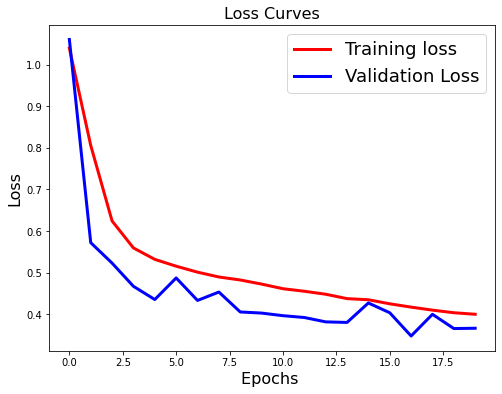

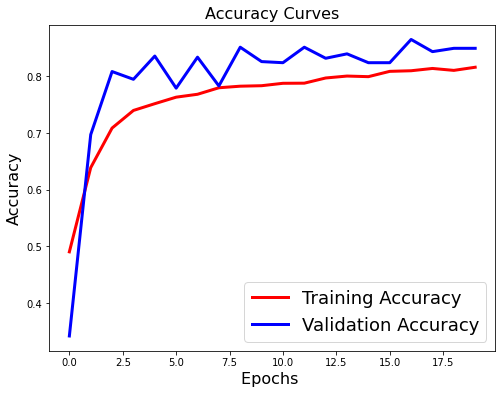

In [ ]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
validation_generator=valGen


Y_pred = alexnet.predict_generator(validation_generator, trainGen.samples // 10+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Normal', 'Bacteria', 'Virus']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[ 37  64  33]
 [ 70 130  53]
 [ 39  65  30]]
Classification Report
              precision    recall  f1-score   support

      Normal       0.25      0.28      0.26       134
    Bacteria       0.50      0.51      0.51       253
       Virus       0.26      0.22      0.24       134

    accuracy                           0.38       521
   macro avg       0.34      0.34      0.34       521
weighted avg       0.38      0.38      0.38       521

